In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pdfplumber
!pip install langdetect
!pip install PyPDF2
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=7e49e1204a2f701faaa268be1eed64b1b64544442dec79bb9cf763ddbfe93b05
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 5.5 MB/s eta 0:00:00


In [3]:
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 52.9 MB/s eta 0:00:00


In [11]:
import os
import re
import nltk
import pdfplumber
from langdetect import detect
from google.colab import drive
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

import fitz  # PyMuPDF

def detect_language(text):
    try:
        idioma = detect(text)
        return idioma
    except:
        return None

def limpiar(text):
    # Eliminar caracteres de nueva línea, tabulación, y otros especificados
    text = text.replace('\n', ' ').replace('\t', ' ').replace('•', ' ').replace('_', ' ')
    # Eliminar secuencias de tres palabras con longitud de 1 a 3 caracteres
    text = re.sub(r'\b\w{1,3}\b\s*\b\w{1,3}\b\s*\b\w{1,3}\b', '', text)
    # Eliminar secuencias de comas repetitivas
    text = re.sub(r',\s*,\s*,\s*,', '', text)
    # Eliminar secuencias de caracteres no alfanuméricos repetidos
    text = re.sub(r'([^\s\w]|_)\1+', '', text)
    # Eliminar palabras de una sola letra
    text = re.sub(r'\b\w\b', '', text)
    # Eliminar espacios sobrantes
    text = re.sub(' +', ' ', text)
    return text.strip()

diccionario_paginas = {
    "1 Rimana. Qichwa - Qullawpi llamk_ana mayt_u. Cuaderno de trabajo - Comunicación 1° - Quechua Collao.pdf": (9, 329),
    "MANUAL_DE_GRAMATICA_QUECHUA_CUSCO_COLLAO.pdf": (3, 44),
    "Manual-Quechua.pdf": (17, 122),
    "Kasarakuy raymimanta.pdf": (6, 89),
    "Muhu papa rikch’arichiymanta. Historias y relatos 3 - Inicial - Quechua Collao.pdf": (4, 9),
    "Alelipa munaqusqan waqaychanankuna. Historias y Relatos 5 - Inicial - Quechua Collao.pdf": (4, 13),
    "Liqichumanta. Historias y relatos 1 - Inicial - Quechua Collao.pdf": (4, 13),
    "Willakuykuna mayt’u - Collao Literatura 1 - 1° Secundaria - Quechua collao.pdf": (8, 159),
    "Willakuykuna mayt’u - Collao Literatura 2 - 2° Secundaria - Quechua collao.pdf": (8, 159),
    "Huk kutis kaq kasqa Literatura 2 quechua collao.pdf": (7, 88),
    "Ayllunchikpa willakuyninkuna. Historias y relatos 2 - Inicial - Quechua Collao.pdf": (6, 25),
    "Papa allay. Historias y Relatos 4 - Inicial - Quechua Collao.pdf": (4, 13),
    "Ayllupi yachasunchik 1 ñiqi qullaw qichwapi. Texto de Comunicación del 1° Primaria - Quechua Collao..pdf": (10, 106),
    "2 Rimana - Qillqasqa Mayt’u Qichwa Qullaw. Texto de Comunicación del 2° Secundaria - Quechua Collao.pdf": (11, 91),
    "3 Rimana - Qillqasqa Mayt’u Qichwa Qullaw. Texto de Comunicación del 3° Secundaria - Quechua Collao.pdf": (11, 91),
    "Ayllupi yachasunchik 3 ñiqi Qullaw qichwapi. Texto de Comunicación del 3° Primaria - Quechua Collao.pdf": (10, 74),
    "4 Rimana - Qillqasqa Mayt’u Qichwa Qullaw. Texto de Comunicación del 4° Secundaria - Quechua Collao.pdf": (11, 91),
    "5 Rimana - Qillqasqa Mayt’u Qichwa Qullaw. Texto de Comunicación del 5° Secundaria - Quechua collao.pdf": (11, 91),
    "Llaqtanchikpa kawsayninkuna. Saberes de los pueblos 1 - 1° Secundaria - Quechua collao.pdf": (4, 158),
    "Guía para el docente Ñawinchanapaq munay qillasqakuna 2015 quechua Cusco-Collao.pdf": (5, 26),
    "Conozca los resultados de su hijo 4o. grado de Primaria informe para padres de familia. Quechua Cusco Collao y castellano como segunda lengua.pdf": (6, 7),
    "Ñawinchanapaq munay qillqasqakuna.pdf": (2, 54),
    "Sumaq Kawsay 1 - quechua collao. Cuaderno de trabajo - Personal Social - Ciencia y Tecnología 1 - Quechua collao.pdf": (4, 146),
    "Llaqtanchikpa kawsayninkuna Saberes de los pueblos 2 - 2° Secundaria - Quechua collao.pdf": (4, 158),
    "Informe_padres_familia_4to_primaria_quechua_2012-GT.pdf": (6, 7),
    "Huk kutis kaq kasqa. Literatura 1 - 5° Primaria - Quechua collao.pdf": (4, 89),
    "Guía para el docente Ñawinchanapaq munay qillqasqakuna 2019.pdf": (2, 10),
    "Kuska yachasunchik cuaderno de trabajo y folder - inicial 5 años - Quechua Collao.pdf": (9, 212),
    "Kuska yachasunchik cuaderno de trabajo y folder - inicial 4 años - Quechua Collao _.pdf": (13, 202),
    "Llaqtanchikpa kawsayninkuna saberes de los pueblos - Comunicación y Ciencia y Tecnología quechua, variante Collao.pdf": (4, 160),
    "Ñawinchanapaq munay qillqasqakuna 2019.pdf": (2, 26),
    "Yupana 1.Qullaw Qichwa. Cuaderno de trabajo - Matemáticas 1 - Quechua Collao.pdf": (4, 146),
    "Rimana 1, Yachayninchikmanta ayninarikusun. Primer grado - Ciclo Intermedio, texto de Comunicación.pdf": (2, 117),
    "Rimana 2, Yachayninchikmanta ayninarikusun. Segundo grado - Ciclo Intermedio, portafolio de evidencias de Comunicación.pdf": (10, 157),
    "Rimana 3, Yachayninchikmanta rimasunchik. Tercer grado - Ciclo Intermedio, portafolio de evidencias de Comunicación.pdf": (2, 129),
    "Rimana 1, Yachayninchikmanta rimasunchik. Primer grado - Ciclo Intermedio, portafolio de evidencias de Comunicación.pdf": (5, 146),
    "Rimana 1,  Yachayninchikmanta ayninarikusun. Primer grado - Ciclo Intermedio, portafolio de evidencias de Comunicación.pdf": (2, 157),
    "Rimana 2, Yachayninchikmanta ayninarikusun. Segundo grado - Ciclo Intermedio, texto de Comunicación.pdf": (2, 116),
    "Rimana 3, Yachayninchikmanta rimasunchik. Tercer grado - Ciclo Intermedio, texto de Comunicación.pdf": (5, 116)
}

def extract_text_from_pdf(pdf_path):
    filename = os.path.basename(pdf_path)

    # Verificar si el archivo está en el diccionario y obtener el rango de páginas
    if filename in diccionario_paginas:
        start_page, end_page = diccionario_paginas[filename]
    else:
        start_page, end_page = 0, None  # Si no se especifica, leer todas las páginas por defecto

    document = fitz.open(pdf_path)
    text = ""

    # Iterar sobre las páginas según el rango especificado
    for page_num in range(start_page, end_page or document.page_count):
        page = document.load_page(page_num)
        page_text = page.get_text()
        page_text = limpiar(page_text)
        text += page_text + " "

    oraciones = text.split('.')
    oraciones = [oracion.strip() for oracion in oraciones if oracion.strip()]

    texto_quechua = []
    for oracion in oraciones:
        idioma = detect_language(oracion)
        if idioma != "es":
            texto_quechua.append(oracion)

    return " ".join(texto_quechua)

"""Se define la función create_corpus que recorre la carpeta en busca de los documentos para crear el corpus"""

def create_corpus(pdf_folder):
    corpus = []
    for filename in os.listdir(pdf_folder):
        print(f"Procesando archivo: {filename}")  # Depuración
        if filename in diccionario_paginas:
            pdf_path = os.path.join(pdf_folder, filename)
            text = extract_text_from_pdf(pdf_path)
            # cleaned_text = clean_text(text)
            corpus.append({'documento': text, 'variante': 'collao'})
        else:
            print(f"Archivo {filename} no encontrado en el diccionario.")  # Depuración
    return corpus

pdf_folder = "/content/drive/My Drive/Corpus/collao"
corpus_collao = create_corpus(pdf_folder)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Procesando archivo: MANUAL_DE_GRAMATICA_QUECHUA_CUSCO_COLLAO.pdf
Procesando archivo: Manual-Quechua.pdf
Procesando archivo: Kasarakuy raymimanta.pdf
Procesando archivo: Muhu papa rikch’arichiymanta. Historias y relatos 3 - Inicial - Quechua Collao.pdf
Procesando archivo: Alelipa munaqusqan waqaychanankuna. Historias y Relatos 5 - Inicial - Quechua Collao.pdf
Procesando archivo: Liqichumanta. Historias y relatos 1 - Inicial - Quechua Collao.pdf
Procesando archivo: Willakuykuna mayt’u - Collao Literatura 1 - 1° Secundaria - Quechua collao.pdf
Procesando archivo: Willakuykuna mayt’u - Collao Literatura 2 - 2° Secundaria - Quechua collao.pdf
Procesando archivo: Huk kutis kaq kasqa Literatura 2 quechua collao.pdf
Procesando archivo: Ayllunchikpa willakuyninkuna. Historias y relatos 2 - Inicial - Quechua Collao.pdf
Procesando archivo: Papa allay. Historias y Relatos 4 - Inicial - Quechua Collao.pdf
Procesando archivo: Ayllupi yachasunchik 1 ñiqi qullaw qichwapi. Texto de Comunicación del 1

In [5]:
import PyPDF2

def extraer_lineas(inicio, fin, pdf_path, tipo):
    paginas = []

    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        num_paginas = len(reader.pages)

        for pagina_num in range(inicio,fin+1):
            pag = []
            pagina = reader.pages[pagina_num]
            contenido = pagina.extract_text()

            # Dividir el contenido de la página en lineas
            palabras = contenido.split('\n')

            #si la linea empieza con digito, entonces se elimina ese digito que es el indicador de pagina
            if palabras[0].isdigit():
              del palabras[0]
            else:
              # si por error la linea empieza con un numero que no deberia ir ahí, lo elimina
              if palabras[0][0].isdigit():
                palabras[0] = palabras[0][1:]

            #une las palabras en una linea
            pag.append(" ".join(palabras))

            #añade las lineas a el texto completo divido por paginas
            paginas.append(" ".join(pag[0].split()))

    #une todo el texto y regresa un diccionario
    return dict([('documento', " ".join(paginas)), ('variante', tipo)])

maychi = extraer_lineas(4,8, "/content/drive/My Drive/Corpus/chanka/maychi.pdf", "Chanka")
chanka5 = extraer_lineas(4,8, "/content/drive/My Drive/Corpus/chanka/antuku.pdf", "Chanka")

In [6]:
def extraer_lineas(inicio, fin, pdf_path, tipo):
    paginas = []

    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        num_paginas = len(reader.pages)

        for pagina_num in range(inicio,fin+1):
            pag = []
            pagina = reader.pages[pagina_num]
            contenido = pagina.extract_text()

            # Dividir el contenido de la página en lineas
            palabras = contenido.split('\n')
            #si la linea empieza con digito, entonces se elimina ese digito que es el indicador de pagina
            if palabras[0].isdigit():
              del palabras[0]
            else:
              #si la linea es el comienzo de un capitulo, el titulo se guardó al ultimo y se procede a eliminarlo
              del palabras[-5:]

            #une las palabras en una linea
            pag.append(" ".join(palabras))

            #añade las lineas a el texto completo divido por paginas
            paginas.append(" ".join(pag[0].split()))

    #une todo el texto y regresa un diccionario
    return (" ".join(paginas), tipo)
    #return dict([('documento', " ".join(paginas)), ('variante', tipo)])

paginas = extraer_lineas(8,158, "/content/drive/My Drive/Corpus/chanka/Chanka_Extraccion1.pdf", "Chanka")

In [7]:
def extraer_lineas(inicio, fin, pdf_path, tipo):
    paginas = []

    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        num_paginas = len(reader.pages)

        for pagina_num in range(inicio,fin+1):
            pag = []
            pagina = reader.pages[pagina_num]
            contenido = pagina.extract_text()

            # Dividir el contenido de la página en lineas
            palabras = contenido.split('\n')
            #si la linea empieza con digito, entonces se elimina ese digito que es el indicador de pagina
            if palabras[0].isdigit():
              del palabras[0]

            #une las palabras en una linea
            pag.append(" ".join(palabras))

            #añade las lineas a el texto completo divido por paginas
            paginas.append(" ".join(pag[0].split()))

    #une todo el texto y regresa un diccionario
    return dict([('documento', " ".join(paginas)), ('variante', tipo)])

paginas_2 = extraer_lineas(8,73, "/content/drive/My Drive/Corpus/chanka/saberes.pdf", "Chanka")

In [8]:
corpusChanka = [
  maychi,
  chanka5,
  paginas,
  paginas_2,
]
len(corpusChanka)

4

In [9]:
import re
from pypdf import PdfReader

# Fuente: Urin Qichwa VOCABULARIO PEDAGÓGICO QUECHUA SUREÑO
reader = PdfReader("/content/drive/My Drive/Corpus/unificada/urin.pdf")

# Secciones con oraciones útiles
pages_comm = reader.pages[17:47]  # Comunicación
pages_pers = reader.pages[60:68]  # Personal social y ciencias
pages_camp = reader.pages[109:131]  # Por campos semánticos

document = ""

### Sección Comunicación ###

# Regex patterns
pagination_pttrn = (
    r"Comunicación\nvocabulario\d+\sParte\sI\s-\sQuechua\ssureño"  # Datos de paginación
)
sentences_pttrn = r"\.[A-Za-z]?\s*[A-Za-z]?\s([^.]+\.)\s*‘([^‘’]+)’\."  # Grupo1 oración quechua, grupo2 oración español encerrada en ‘’

# Processing
for page in pages_comm:
    # Clean pagination
    text = re.sub(pagination_pttrn, "", page.extract_text())

    # Find quechua sentences
    matches = re.findall(sentences_pttrn, text)
    for m in matches:
        sentence = m[0].replace("\n", "")
        sentence = sentence.replace("/ ", "/")
        document += sentence + "\n"

### Sección Personal social y ciencias ###

# Regex patterns
pagination_pttrn = r"Personal\ssocial\sy\sCiencia\sy\stecnología\nvocabularioParte\sII\s-\sQuechua sureño\s\d+"  # Datos de paginación
sentences_pttrn = r"\.[A-Za-z]?\s*[A-Za-z]?\s([^.]+\.)\s*‘([^‘’]+)’\."  # Grupo1 oración quechua, grupo2 oración español encerrada en ‘’

# Processing
for page in pages_pers:
    # Clean pagination
    text = re.sub(pagination_pttrn, "", page.extract_text())

    # Find quechua sentences
    matches = re.findall(sentences_pttrn, text)
    for m in matches:
        sentence = m[0].replace("\n", "")
        sentence = sentence.replace("/ ", "/")
        document += sentence + "\n"

### Sección campos semánticos ###

# Regex patterns
pagination_pttrn = r"Palabras\spor\scampos\ssemánticos\sdel\squechua\ssureño\nUsadas\sen\sel\sárea\sde\sPersonal\ssocial\sy\sCiencia\sy\stecnologíaParte\sIII\s-\sQuechua\ssureño\s\d+"  # Datos de paginación
patron = r"([a-z].*?\.)\s*\n\s*((?:[A-Z].*?\.\s*)+)"  # Grupo1 oración en minúscula (palabras), grupo2 grupo de oraciones que empiezan en mayúsucula (ejemplos en quechua)

# Processing
for page in pages_camp:
    # Clean pagination
    text = re.sub(pagination_pttrn, "", page.extract_text())

    # Find quechua sentences
    matches = re.findall(patron, text, re.DOTALL)
    for m in matches:
        sentence = m[1].replace("\n", "")
        sentence = sentence.replace("/ ", "/")
        document += sentence + "\n"


corpusUnificado = {'documento': document, 'variante': 'unificada'}

In [10]:
len(corpusUnificado)

2

In [14]:
len(corpus_collao)

39

In [12]:
corpus=[]
for doc in corpusChanka:
  corpus.append(doc)
corpus.append({'documento': corpusUnificado["documento"], 'variante': corpusUnificado["variante"]})
for doc in corpus_collao:
  corpus.append(doc)

In [13]:
len(corpus)

44

In [16]:
# Guardar el corpus en un archivo de texto
with open("corpus.txt", "w") as f:
    for document in corpus:
        # Convert the document (likely a dictionary) to a string before writing
        f.write(str(document) + "\n")

In [17]:
print("Número de documentos en el corpus:", len(corpus))

Número de documentos en el corpus: 44


In [19]:
# Guardar el corpus en un archivo de texto
with open("corpus.txt", "w") as f:
    for document in corpus:
        # Check if the document is a dictionary before accessing 'documento'
        if isinstance(document, dict):
            f.write(str(document) + "\n")
        # Handle the case where document is a tuple
        elif isinstance(document, tuple):
            f.write(str({'documento': document[0], 'variante': document[1]}) + "\n")

# Obtener el número de palabras de cada documento y del corpus
num_palabras_documento = []
for documento in corpus:
    # Check if the document is a dictionary before accessing 'documento'
    if isinstance(documento, dict):
        num_palabras = len(documento['documento'].split())
        num_palabras_documento.append(num_palabras)
    # Handle the case where document is a tuple
    elif isinstance(document, tuple):
        num_palabras = len(documento[0].split())  # Access the first element of the tuple
        num_palabras_documento.append(num_palabras)

# Número total de palabras en el corpus
total_palabras_corpus = sum(num_palabras_documento)
print("Número total de palabras en el corpus:", total_palabras_corpus)


Número total de palabras en el corpus: 233499


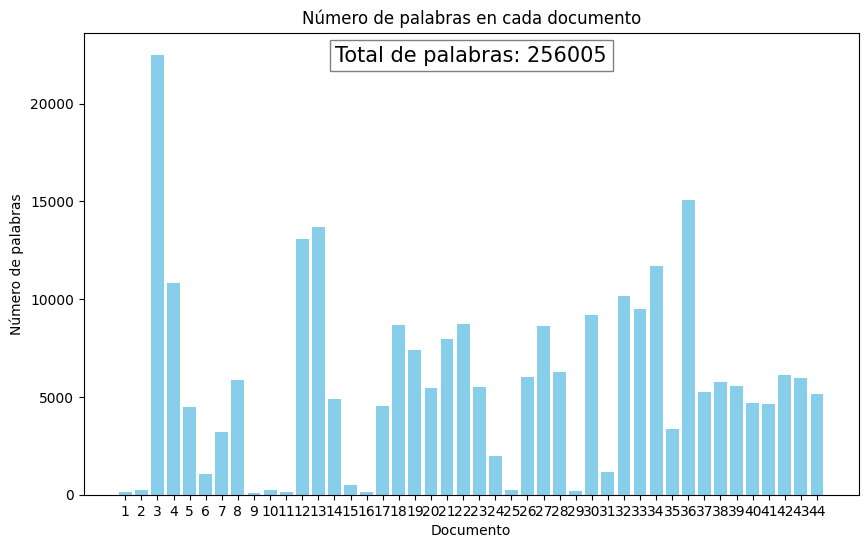

In [22]:
import matplotlib.pyplot as plt

# Obtener el número de palabras de cada documento y del corpus
num_palabras_documento = []
for documento in corpus:
    if isinstance(documento, dict):
        num_palabras = len(documento['documento'].split())
    elif isinstance(documento, tuple):
        num_palabras = len(documento[0].split()) # Access the text from the tuple
    else:
        num_palabras = 0 # Handle cases where documento is neither a dict nor a tuple
        print(f"Unexpected data type: {type(documento)}") # Print a warning for unexpected types

    num_palabras_documento.append(num_palabras)

# Número total de palabras en el corpus
total_palabras_corpus = sum(num_palabras_documento)

# Crear gráfico de barras para mostrar el número de palabras en cada documento
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(num_palabras_documento) + 1), num_palabras_documento, color='skyblue')
plt.xlabel('Documento')
plt.ylabel('Número de palabras')
plt.title('Número de palabras en cada documento')
plt.xticks(range(1, len(num_palabras_documento) + 1))

# Agregar el número total de palabras en el gráfico
plt.text(0.5, 0.95, f'Total de palabras: {total_palabras_corpus}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=15, bbox=dict(facecolor='white', alpha=0.5))


plt.show()